In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",120)
pd.set_option("display.max_rows",120)

df= pd.read_csv("Bengaluru_House_data.csv")
df.shape

(13320, 9)

In [3]:
df.shape[0]

13320

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.isnull().sum()/df.shape[0] * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

society has more than 40% null values we should drop this column

In [6]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [9]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2= df.drop(columns=["availability","society","area_type"],axis=1)

In [11]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [12]:
df2["balcony"].mode()

0    2.0
dtype: float64

In [13]:
df2.fillna({
    "balcony":2.0
},inplace=True)

In [14]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [15]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

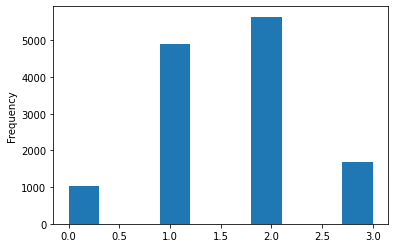

In [16]:
df2["balcony"].plot(kind='hist')

In [17]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
def get_bhk(x):
    token= x.split(' ')
    return int(token[0])

In [19]:
df2["bhk"]=df2["size"].apply(get_bhk)

In [20]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [21]:
df2["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [22]:
df2[df2["bhk"]>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


looks like an outlier here

In [23]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

here data is found to be missarranged (in a range type) 
lets replace the datapoints with it mean value

In [24]:
def correct(x):
    token= x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        float(x)
        return float(x)
        
    except:
        return None
    

In [25]:
df2["total_sqft"]=df2["total_sqft"].apply(correct)

In [26]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [27]:
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [28]:
df2["total_sqft"].dtype

dtype('float64')

In [29]:
mean=round(df2["total_sqft"].mean(),2)
mean

1555.3

In [30]:
df2.fillna({
    "total_sqft":mean
},inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [31]:
df2["price_per_sqft"]=round((df2["price"]*100000)/df2["total_sqft"])
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3700.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4306.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6246.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.0


In [32]:
len(df2["location"].unique())

1304

In [33]:
df2["location"]=df2["location"].apply(lambda x: x.strip())

In [34]:
location_stats= df2.groupby("location")["location"].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [35]:
len(location_stats[location_stats<=10])

1052

In [36]:
location_stats_less_than_10 =  location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [37]:
df2["location"]=df2["location"].apply(lambda x:"other" if x in location_stats_less_than_10 else x)
len(df2.location.unique())

242

## outliars removel

In [38]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3700.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4306.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6246.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.0


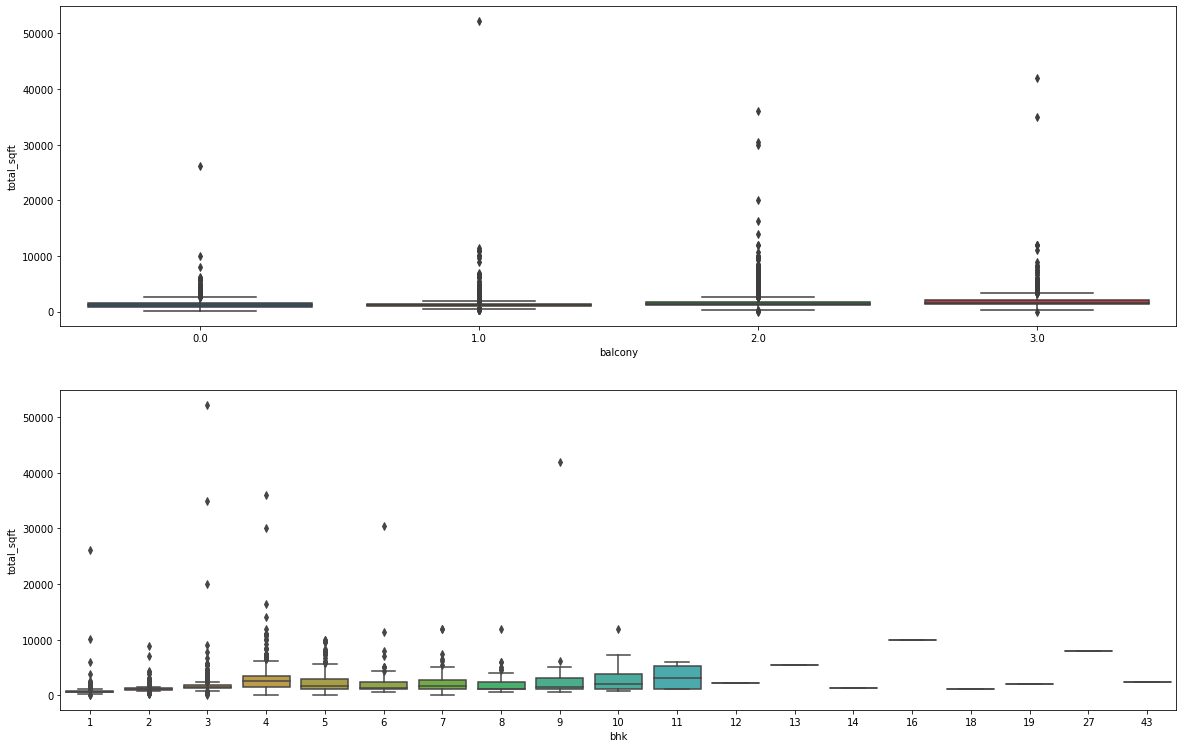

In [39]:
plt.figure(figsize=[20,20])
plt.subplot(311)
sns.boxplot(data=df2,x="balcony",y='total_sqft')

plt.subplot(312)
sns.boxplot(data=df2,x=df2["bhk"],y='total_sqft')


plt.show()

In [40]:
df2[df2["price"]>1500]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
408,Rajaji Nagar,7 BHK,12000.0,6.0,3.0,2200.0,7,18333.0
605,Malleshwaram,7 BHK,12000.0,7.0,3.0,2200.0,7,18333.0
2623,other,4 Bedroom,30000.0,4.0,2.0,2100.0,4,7000.0
3180,other,5 BHK,8321.0,5.0,3.0,2700.0,5,32448.0
4162,other,4 Bedroom,7000.0,5.0,2.0,2050.0,4,29286.0
4929,other,8 Bedroom,12000.0,9.0,2.0,1900.0,8,15833.0
4963,Malleshwaram,5 BHK,7500.0,7.0,3.0,1700.0,5,22667.0
6421,Bommenahalli,4 Bedroom,2940.0,3.0,2.0,2250.0,4,76531.0
6838,Rajaji Nagar,5 BHK,7500.0,8.0,3.0,1700.0,5,22667.0
7082,Ulsoor,4 BHK,7200.0,5.0,2.0,1584.0,4,22000.0


In [41]:
#lets suppose 300  sqft per bhk as threshhold value
df2[df2["total_sqft"]/df2["bhk"] <300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36275.0
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.0
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10661.0
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.0
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.0


In [42]:
df3= df2[~(df2["total_sqft"]/df2["bhk"] <300)]
df3.shape

(12498, 8)

In [43]:
df3.price_per_sqft.describe()

count     12498.000000
mean       6316.820691
std        4184.044038
min         268.000000
25%        4211.000000
50%        5294.000000
75%        6932.250000
max      176471.000000
Name: price_per_sqft, dtype: float64

In [44]:
#removing per squre fit outliers

def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for keys , subdf in df.groupby("location"):
        m= np.mean(subdf.price_per_sqft)
        std= np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out= pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df4=remove_pps_outliers(df3)
df4.shape

(10286, 8)

  we want to  see if the property prices are more for 1bhk and less  for 2 bhk for the same location

In [45]:
df4[df4["bhk"]<3]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11984.0
13,1st Phase JP Nagar,2 BHK,1394.0,2.0,1.0,100.0,2,7174.0
14,1st Phase JP Nagar,2 BHK,1077.0,2.0,2.0,93.0,2,8635.0
15,1st Phase JP Nagar,2 Bedroom,1566.0,2.0,0.0,180.0,2,11494.0
16,1st Phase JP Nagar,1 BHK,840.0,2.0,2.0,50.0,1,5952.0
...,...,...,...,...,...,...,...,...
10279,other,2 BHK,1095.0,2.0,1.0,57.0,2,5205.0
10280,other,2 BHK,1256.0,2.0,1.0,65.0,2,5175.0
10281,other,2 BHK,1353.0,2.0,2.0,110.0,2,8130.0
10282,other,1 Bedroom,812.0,1.0,0.0,26.0,1,3202.0


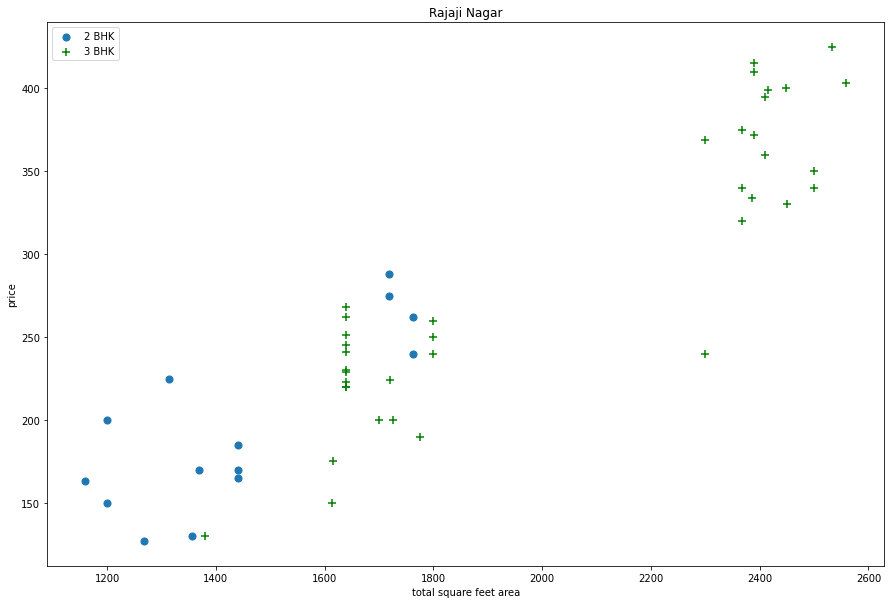

In [46]:
def plot_scatter_chart(df,location):
    bhk2=df[(df["location"]==location) & (df["bhk"]==2)]
    bhk3=df[(df["location"]==location) & (df["bhk"]==3)]    
    plt.figure(figsize=[15,10])
    plt.scatter(bhk2["total_sqft"],bhk2["price"],label="2 BHK",s=50)
    plt.scatter(bhk3["total_sqft"],bhk3["price"],marker='+',label="3 BHK",s=50,color="green")
    plt.xlabel("total square feet area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

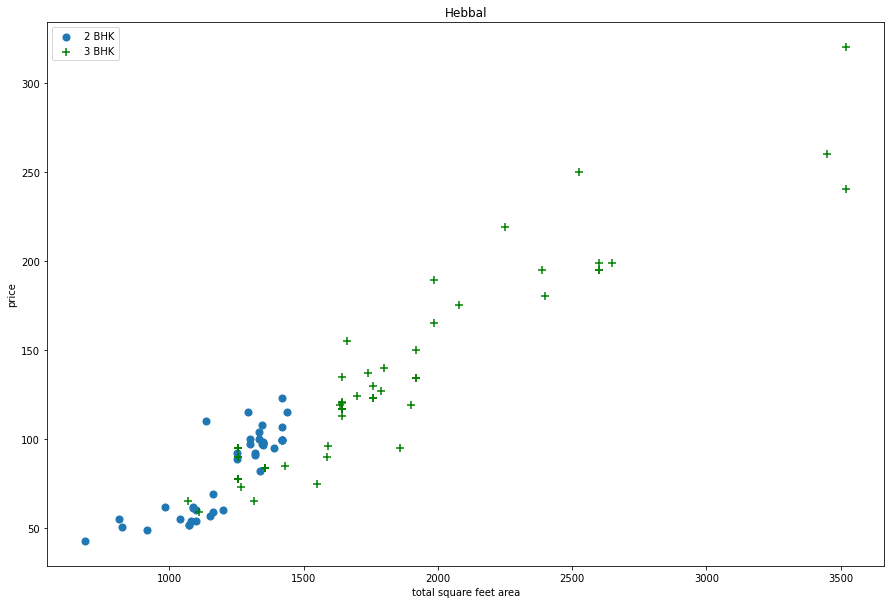

In [47]:
plot_scatter_chart(df4,"Hebbal")

we should remove properties where for some location, the price of (for example ) 3 bedroom os less than 2 bedroom
apartment (with same squre ft area ) What we will do is for a given,we will a dictionaty of stats per bhk

{

     "1":{
         "mean": 4000'
         "std": 2000,
         "count": 34
     }
    
     "2":{
         "mean": 430'
         "std": 2000,
         "count": 22
     }
}

now we can remove those 2 bhk apartments price less than mean price of 1 bhk apartment 


In [48]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats ={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                "mean":np.mean(bhk_df.price_per_sqft),
                "std":np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                    exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")       

In [49]:
df5=remove_bhk_outliers(df4)

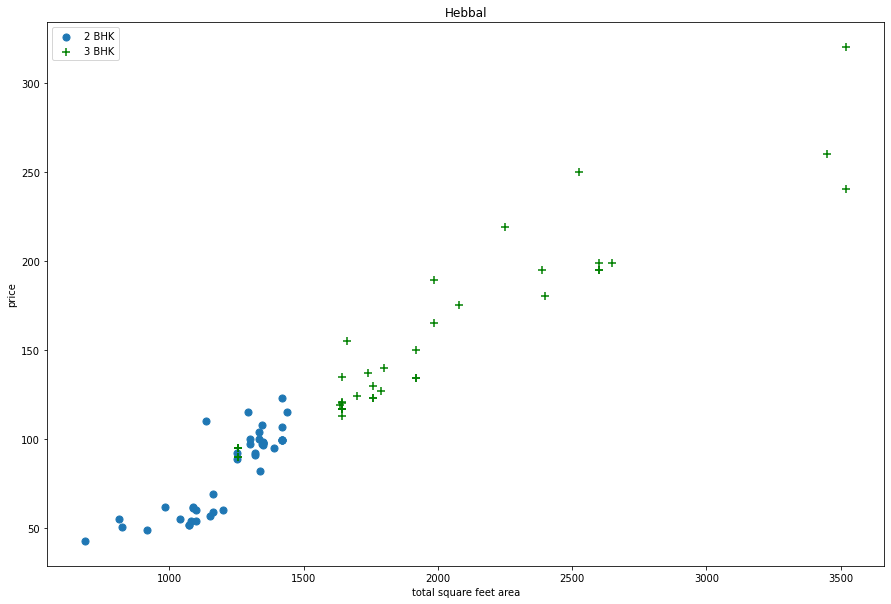

In [50]:
plot_scatter_chart(df5,"Hebbal")

now it has removed most of the outliers 

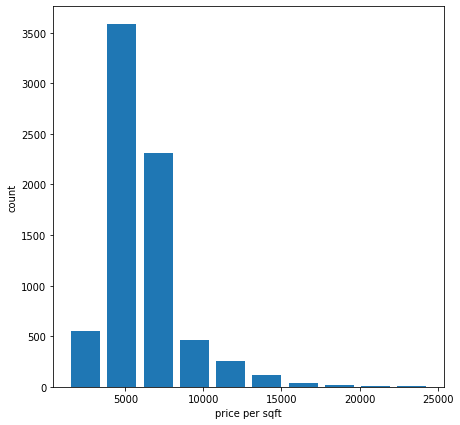

In [51]:
plt.figure(figsize=[7,7])
plt.hist(df5["price_per_sqft"],rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("count")
plt.show()

majority of the property costs 5000 to 10000 rupees per square ft.

In [52]:
 df5["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
df5[df5["bath"]>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5294,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.0
8519,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.0
8609,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.0
9346,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.0
9678,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.0


hypothesis: we should remove the data which have bedroom+2 no. of bathroom

In [54]:
df6= df5[df5["bath"]<=df5["bhk"]+2]
df6.shape

(7340, 8)

In [55]:
df6["balcony"].unique()

array([1., 2., 3., 0.])

In [56]:
df6[df6["balcony"]>df6["bhk"]+1]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft


In [57]:
df6.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15018.0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11902.0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11984.0


In [58]:
df7=df6.drop(columns=["size","price_per_sqft"],axis=1)
df7.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [59]:
df8= pd.get_dummies(df7["location"])

df9= pd.concat([df7,df8],axis=1)
df9.head()


,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,...,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 droping the last column becouse we can use n-1 feature after one hot encoding

In [60]:
df9.drop(columns=['other','location'],axis=1,inplace=True)

In [61]:
df9.to_csv("cleaned_df.csv")